In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### stiefel manifold

In [2]:
def foo(x, A):
    return 0.5 * np.trace(x.T @ A @ x)

def fooGradient(x, A):
    return A @ x

def gram_schmidt(x):
    Q, _ = np.linalg.qr(x)
    return Q

def happy(x, next_x, A):
    f1 = foo(x, A)
    f2 = foo(next_x, A)
    # print(f1 - f2)
    return np.abs(f1 - f2) < 1e-8

def armijo(x, A, alpha, direction):
    f1 = foo(x, A)
    f2 = foo(gram_schmidt(x + alpha * direction), A)
    # print("f1=", f1, "f2=", f2, "alpha=", alpha)
    return f2 < f1

def symmetric(x):
    return 0.5 * (x + x.T)

def projection(gradX, x):
    return gradX - x @ symmetric(x.T @ gradX)

In [3]:
def RayleighQuotient():
    np.random.seed(42)

    # Generate a random 100x3 matrix
    random_matrix = np.random.rand(100, 3)
    # Obtain an orthogonal matrix using Gram-Schmidt process
    x = gram_schmidt(random_matrix)

    # Generate a random lower triangular matrix
    lower_triangular = np.tril(np.random.randint(0, 10, size=(100, 100)))
    # Generate the symmetric matrix by adding its transpose to itself
    A_matrix = lower_triangular + lower_triangular.T

    fooValues = []
    rho = 0.5
    alpha_0 = 1
    k = 1

    while True:
        alpha = alpha_0
        gradX = fooGradient(x, A_matrix)
        Z = projection(gradX, x)
        direction = -Z
        fooValues.append(foo(x, A_matrix))
        while not armijo(x, A_matrix, alpha, direction):
            alpha *= rho
        if happy(x, gram_schmidt(x + alpha * direction), A_matrix):
            break
        # next step
        x = gram_schmidt(x + alpha * direction)
        k = k + 1
        # print("k:", k, "foo:", foo(x, A_matrix), "alpha:", alpha)
    return x, A_matrix, fooValues

def top3eigenvalues(x):
    eigenvalues = np.linalg.eigvals(x)
    sorted_eigenvalues = np.sort(eigenvalues)
    return sorted_eigenvalues[:3]

x, A, fooValues = RayleighQuotient()
# Print the three smallest eigenvalues
print("Three smallest eigenvalues(A):")
print(top3eigenvalues(A))
print("Three smallest eigenvalues(x.T A X):")
print(top3eigenvalues(x.T @ A @ x))

Three smallest eigenvalues(A):
[-52.67841119 -50.05534054 -47.68535797]
Three smallest eigenvalues(x.T A X):
[-52.67840971 -50.05534054 -47.68535796]


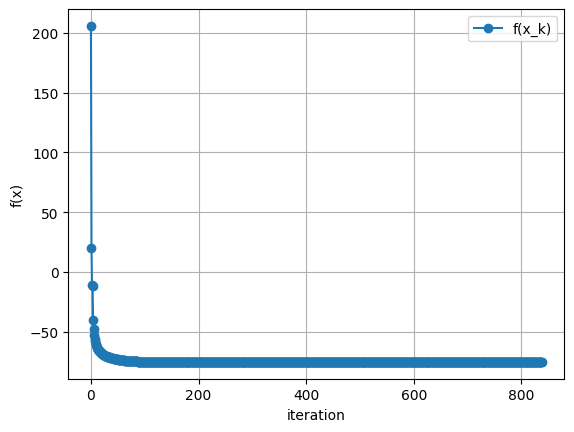

In [4]:
k = [i for i in range(len(fooValues))]
plt.plot(k[0:], fooValues[0:], marker='o', linestyle='-', label='f(x_k)')

# Add title and labels
plt.xlabel('iteration')
plt.ylabel('f(x)')
plt.legend()

# Show the plot
plt.grid(True)  # Show grid
plt.show()

#### Grassmann manifold

In [5]:
def goo(x, A):
    return np.trace(np.linalg.inv(x.T @ x) @ x.T @ A @ x)

def gooGradient(x, A):
    n = len(x)
    I = np.identity(n)
    return 2 * (I - x @ np.linalg.inv(x.T @ x) @ x.T) @ A @ x

def gram_schmidt(x):
    Q, _ = np.linalg.qr(x)
    return Q

def happy(x, next_x, A):
    f1 = foo(x, A)
    f2 = foo(next_x, A)
    # print(f1 - f2)
    return np.abs(f1 - f2) < 1e-8

def armijo(x, A, alpha, direction):
    f1 = foo(x, A)
    f2 = foo(gram_schmidt(x + alpha * direction), A)
    # print("f1=", f1, "f2=", f2, "alpha=", alpha)
    return f2 < f1

def symmetric(x):
    return 0.5 * (x + x.T)

def projection(gradX, x):
    return gradX - x @ symmetric(x.T @ gradX)

In [6]:
def RayleighQuotient():
    np.random.seed(42)

    # Generate a random 100x3 matrix
    random_matrix = np.random.rand(100, 3)
    # Obtain an orthogonal matrix using Gram-Schmidt process
    x = gram_schmidt(random_matrix)

    # Generate a random lower triangular matrix
    lower_triangular = np.tril(np.random.randint(0, 10, size=(100, 100)))
    # Generate the symmetric matrix by adding its transpose to itself
    A_matrix = lower_triangular + lower_triangular.T

    gooValues = []
    rho = 0.5
    alpha_0 = 1
    k = 1

    while True:
        alpha = alpha_0
        gradX = gooGradient(x, A_matrix)
        Z = projection(gradX, x)
        direction = -Z
        gooValues.append(goo(x, A_matrix))
        while not armijo(x, A_matrix, alpha, direction):
            alpha *= rho
        if happy(x, gram_schmidt(x + alpha * direction), A_matrix):
            break
        # next step
        x = gram_schmidt(x + alpha * direction)
        k = k + 1
        # print("k:", k, "goo:", goo(x, A_matrix), "alpha:", alpha)
    return x, A_matrix, gooValues

def top3eigenvalues(x):
    eigenvalues = np.linalg.eigvals(x)
    sorted_eigenvalues = np.sort(eigenvalues)
    return sorted_eigenvalues[:3]

x, A, gooValues = RayleighQuotient()
# Print the three smallest eigenvalues
print("Three smallest eigenvalues(A):")
print(top3eigenvalues(A))
print("Three smallest eigenvalues(x.T A X):")
print(top3eigenvalues(x.T @ A @ x))

Three smallest eigenvalues(A):
[-52.67841119 -50.05534054 -47.68535797]
Three smallest eigenvalues(x.T A X):
[-52.6784097  -50.05534054 -47.68535796]


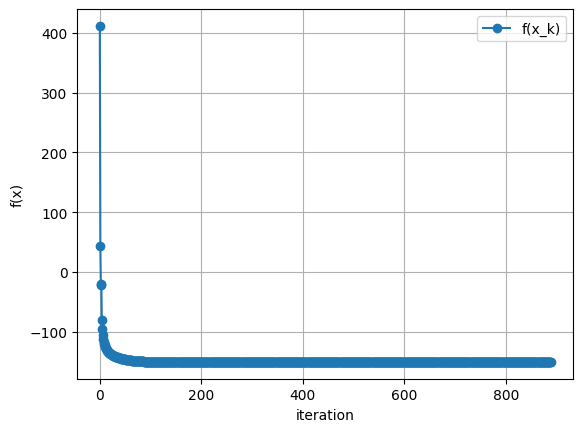

In [6]:
k = [i for i in range(len(gooValues))]
plt.plot(k[0:], gooValues[0:], marker='o', linestyle='-', label='f(x_k)')

# Add title and labels
plt.xlabel('iteration')
plt.ylabel('f(x)')
plt.legend()

# Show the plot
plt.grid(True)  # Show grid
plt.show()